<a href="https://colab.research.google.com/github/humeratabassum/Alzheimer-Dataset-classification/blob/main/Augmented_Alzheimer_Dataset_classification_(H).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
from io import BytesIO

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()

for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('extracted_folder')

print(os.listdir('extracted_folder'))

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/extracted_folder/OriginalDataset', image_size=(45, 45))


Found 6400 files belonging to 4 classes.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
data_iterator = data.as_numpy_iterator()


In [ ]:
batch = data_iterator.next()


In [ ]:
data = data.map(lambda x,y: (x/255, tf.keras.utils.to_categorical(y, 4)))


In [ ]:
scaled_iterator = data.as_numpy_iterator()


In [ ]:
batch = scaled_iterator.next()


In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [ ]:
model_cnn = Sequential()

model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(45, 45, 3)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())

model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(4, activation='softmax'))

model_cnn.compile(optimizer=tf.optimizers.Adadelta(), loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])
model_cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 43, 43, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 41, 41, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,296,836 (12.58 MB)

 Trainable params: 3,296,836 (12.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model_cnn.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.4233 - loss: 1.2780 - val_accuracy: 0.4930 - val_loss: 1.1419
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4810 - loss: 1.1402 - val_accuracy: 0.4969 - val_loss: 1.0955
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.4755 - loss: 1.1004 - val_accuracy: 0.4867 - val_loss: 1.0746
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4891 - loss: 1.0789 - val_accuracy: 0.4930 - val_loss: 1.0590
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5014 - loss: 1.0689 - val_accuracy: 0.4953 - val_loss: 1.0542
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4868 - loss: 1.0586 - val_accuracy: 0.4977 - val_loss: 1.0462
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4941 - loss: 1.0497 - val_accuracy: 0.5070 - val_loss: 1.0287
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5036 - loss: 1.0459 - val_acc

In [ ]:
def pred_alza(img):
    resize = tf.image.resize(img, (45,45))
    yhat=model_cnn.predict(np.expand_dims(resize/255, 0))
    id_label = []
    for i in yhat[0]:
        if i < yhat[0].max():
            id_label.append(0)
        else:
            id_label.append(1)

    id_label = id_label
    name_label = ['MildDemented','ModerateDemented','NonDemented', 'VeryMildDemented']
    temp = list(zip(id_label, name_label))
    for i in range(len(temp)):
        if temp[i][0]==1:
            label = temp[i][1]

    return(label)

In [ ]:
import tensorflow as tf
from keras.applications import DenseNet201
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(45, 45, 3), pooling=None)


74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x = base_model.output

x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)  # Add your custom dense layers here

predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


### Define the list of optimizers to iterate through

In [ ]:

optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.001),
    'Adagrad': Adagrad(learning_rate=0.001),
    'RMSprop': RMSprop(learning_rate=0.001)
}

# Define a learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Data Augmentation (modify as needed for your dataset)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Loop through each optimizer, compile the model, and print evaluation metrics
for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer...\n")

    # Recreate the model so weights are reset before training with each optimizer
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(45, 45, 3), pooling=None)
    x = data_augmentation(base_model.output)  # Apply data augmentation
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.4)(x)  # Adding Dropout for regularization
    predictions = Dense(4, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Unfreeze some top layers in DenseNet201
    for layer in base_model.layers[-30:]:  # Adjust the number of layers as needed
        layer.trainable = True

    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

    # Train the model with learning rate scheduler
    history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback, lr_scheduler])

    # Evaluate the model on validation data
    val_loss, val_accuracy = model.evaluate(val, verbose=0)

    # Print out the validation loss and accuracy for the current optimizer
    print(f"{name} Optimizer - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")



Training with Adam optimizer...

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 182s 354ms/step - accuracy: 0.4972 - loss: 1.2707 - val_accuracy: 0.4055 - val_loss: 1.2360 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 42s 298ms/step - accuracy: 0.5383 - loss: 0.9588 - val_accuracy: 0.4523 - val_loss: 0.9877 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 45s 324ms/step - accuracy: 0.5992 - loss: 0.8213 - val_accuracy: 0.3258 - val_loss: 4.0019 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 42s 301ms/step - accuracy: 0.6724 - loss: 0.7292 - val_accuracy: 0.2203 - val_loss: 4.7152 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 42s 301ms/step - accuracy: 0.7509 - loss: 0.5849 - val_accuracy: 0.3547 - val_loss: 3.9389 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 314ms/step - accuracy: 0.8703 - loss: 0.3609 - val_accuracy: 0.7164 - val_loss: 0.7345 - learning_rate: 5.0000e-04
Epoch 7/20
140/140 ━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.946875, shape=(), dtype=float32) tf.Tensor(0.946875, shape=(), dtype=float32) tf.Tensor(0.946875, shape=(), dtype=float32)


In [ ]:
def pred_alza(img):
    resize = tf.image.resize(img, (45,45))
    yhat=model.predict(np.expand_dims(resize/255, 0))
    id_label = []
    for i in yhat[0]:
        if i < yhat[0].max():
            id_label.append(0)
        else:
            id_label.append(1)

    id_label = id_label
    name_label = ['MildDemented','ModerateDemented','NonDemented', 'VeryMildDemented']
    temp = list(zip(id_label, name_label))
    for i in range(len(temp)):
        if temp[i][0]==1:
            label = temp[i][1]

    return(label)

##classification

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


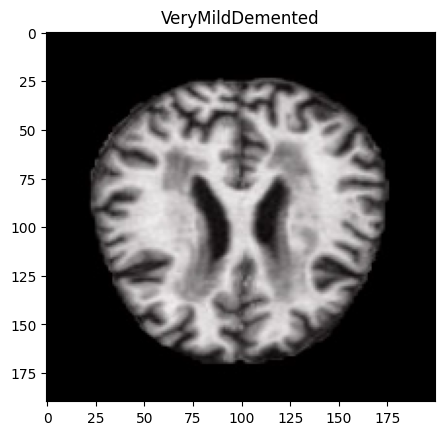

In [ ]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/extracted_folder/AugmentedAlzheimerDataset/VeryMildDemented/0020ed3a-2b5f-4e46-9b96-97484c10a88c.jpg')
label = pred_alza(img)
plt.imshow(img)
plt.title(label)
plt.show()